In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

*Везде делал проверку на reverse в начале чтобы это не влияло на общее время работы*

In [2]:
def bubble_sort(arr, reverse = False):
    start_time = time.perf_counter()
    if reverse:   
        for n in range(len(arr) - 1, 0, -1):
            for i in range(n):
                if arr[i] < arr[i + 1]:
                    arr[i], arr[i + 1] = arr[i + 1], arr[i]
    else:
        for n in range(len(arr) - 1, 0, -1):
            for i in range(n):
                if arr[i] > arr[i + 1]:
                    arr[i], arr[i + 1] = arr[i + 1], arr[i]
    return time.perf_counter() - start_time

In [3]:
def selection_sort(nums, reverse = False):
    start_time = time.perf_counter()
    if reverse:
        for i in range(len(nums)):
            lowest_value_index = i
            for j in range(i + 1, len(nums)):
                if nums[j] > nums[lowest_value_index]:
                    lowest_value_index = j
            nums[i], nums[lowest_value_index] = nums[lowest_value_index], nums[i]
    else:
        for i in range(len(nums)):
            lowest_value_index = i
            for j in range(i + 1, len(nums)):
                if nums[j] < nums[lowest_value_index]:
                    lowest_value_index = j
            nums[i], nums[lowest_value_index] = nums[lowest_value_index], nums[i]
    return time.perf_counter() - start_time

In [4]:
def heapify(nums, heap_size, root_index, reverse = False):
    if reverse:
        largest = root_index
        left_child = (2 * root_index) + 1
        right_child = (2 * root_index) + 2

        if left_child < heap_size and nums[left_child] < nums[largest]:
            largest = left_child

        if right_child < heap_size and nums[right_child] < nums[largest]:
            largest = right_child

        if largest != root_index:
            nums[root_index], nums[largest] = nums[largest], nums[root_index]
            heapify(nums, heap_size, largest, reverse)
    else:
        largest = root_index
        left_child = (2 * root_index) + 1
        right_child = (2 * root_index) + 2

        if left_child < heap_size and nums[left_child] > nums[largest]:
            largest = left_child

        if right_child < heap_size and nums[right_child] > nums[largest]:
            largest = right_child

        if largest != root_index:
            nums[root_index], nums[largest] = nums[largest], nums[root_index]
            heapify(nums, heap_size, largest, reverse)

def heap_sort(nums, reverse = False):
    start_time = time.perf_counter()
    n = len(nums)
    for i in range(n, -1, -1):
        heapify(nums, n, i, reverse)

    for i in range(n - 1, 0, -1):
        nums[i], nums[0] = nums[0], nums[i]
        heapify(nums, i, 0, reverse)
    return time.perf_counter() - start_time

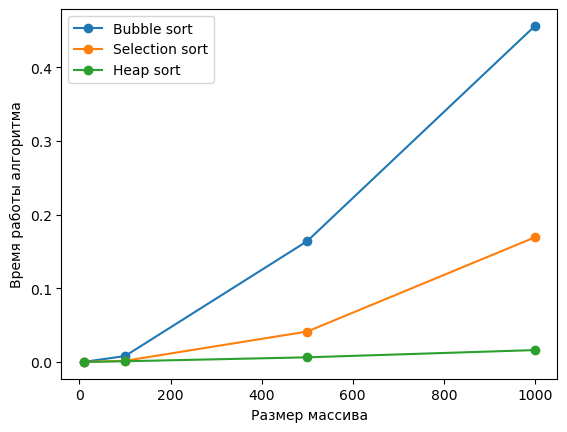

Время самой быстрой сортировки для 1000 элементов: 0.016116800004965626


In [5]:
high = 1e6
sizes = [10, 100, 500, 1000]
bubble_sort_times = [bubble_sort(np.random.randint(low = 0, high=high, size=i)) for i in sizes]
selection_sort_times = [selection_sort(np.random.randint(low = 0, high=high, size=i)) for i in sizes]
heap_sort_times = [heap_sort(np.random.randint(low = 0, high=high, size=i)) for i in sizes]
plt.plot(sizes, bubble_sort_times, label = "Bubble sort", marker = "o")
plt.plot(sizes, selection_sort_times, label = "Selection sort", marker = "o")
plt.plot(sizes, heap_sort_times, label = "Heap sort", marker = "o")
plt.xlabel("Размер массива")
plt.ylabel("Время работы алгоритма")
plt.legend()
plt.show()
print(f'Время самой быстрой сортировки для 1000 элементов: {min(bubble_sort_times[3], selection_sort_times[3], heap_sort_times[3])}')

### Проверка что сортировки вообще работают

In [6]:
# Пузырёк
a = np.random.randint(0, int(1e6), 10)
print(a)
bubble_sort(a)
print(a)

# Вставкой
b = np.random.randint(0, int(1e6), 10)
print(b)
selection_sort(b)
print(b)

# Кучей
c = np.random.randint(0, int(1e6), 10)
print(c)
heap_sort(c)
print(c)

[ 12752 810600 898579 185413 363404 699309 711010 664014 958365 585452]
[ 12752 185413 363404 585452 664014 699309 711010 810600 898579 958365]
[492130 223600 461099 270653 531606 142609 726477 793729  14127 215086]
[ 14127 142609 215086 223600 270653 461099 492130 531606 726477 793729]
[ 61549 722184  67478 879777 238351  24264 461735 858740 955699 726454]
[ 24264  61549  67478 238351 461735 722184 726454 858740 879777 955699]


In [7]:
# Пузырёк
a = np.random.randint(0, int(1e6), 10)
print(a)
bubble_sort(a, reverse=True)
print(a)

# Вставкой
b = np.random.randint(0, int(1e6), 10)
print(b)
selection_sort(b, reverse=True)
print(b)

# Кучей
c = np.random.randint(0, int(1e6), 10)
print(c)
heap_sort(c, reverse=True)
print(c)

[517410 293247 171145 780817 839854 960462 456249 975980 121986 302926]
[975980 960462 839854 780817 517410 456249 302926 293247 171145 121986]
[781800 559193 175028  88661 656549  40221 287664 877116  21033 497920]
[877116 781800 656549 559193 497920 287664 175028  88661  40221  21033]
[172303 842377 633911 550458  38631  29652 419661 368385 750636  92272]
[842377 750636 633911 550458 419661 368385 172303  92272  38631  29652]
